In [129]:
# Import Important Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [130]:
# Reading CSV File
india_df = pd.read_csv('covid_19_india.csv')
india_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [131]:
# Check for NULL values in our dataframe
india_df.isnull().sum()  # no null values are present

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [132]:
india_df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [133]:
# Drop unwanted columns from our dataframe
india_df = india_df.drop(['Sno','ConfirmedForeignNational','ConfirmedIndianNational'],axis=1)

In [134]:
# Dataframe after dropping columns which are not required.
# Next we have rename some columns so it will be easy for us to call them
india_df.rename(columns={'State/UnionTerritory':'State'},inplace=True)
india_df.head()

,Date,Time,State,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,0,0,1
1,2020-01-31,6:00 PM,Kerala,0,0,1
2,2020-02-01,6:00 PM,Kerala,0,0,2
3,2020-02-02,6:00 PM,Kerala,0,0,3
4,2020-02-03,6:00 PM,Kerala,0,0,3


In [135]:
# Calculate active cases in our country
india_df['Active'] = india_df['Confirmed'] - india_df['Cured'] - india_df['Deaths']
india_df.tail()

,Date,Time,State,Cured,Deaths,Confirmed,Active
15801,2021-06-08,8:00 AM,Telangana,564303,3394,593103,25406
15802,2021-06-08,8:00 AM,Tripura,49579,572,56169,6018
15803,2021-06-08,8:00 AM,Uttarakhand,313566,6731,334419,14122
15804,2021-06-08,8:00 AM,Uttar Pradesh,1662069,21333,1699083,15681
15805,2021-06-08,8:00 AM,West Bengal,1388771,16362,1432019,26886


In [136]:
# Check dtypes of columns in our dataframe
india_df.dtypes

Date         object
Time         object
State        object
Cured         int64
Deaths        int64
Confirmed     int64
Active        int64
dtype: object

In [137]:
# We have  to convert Date and Time in appropriate format
india_df['Date'] = pd.to_datetime(india_df.Date)


In [138]:
india_df.dtypes

Date         datetime64[ns]
Time                 object
State                object
Cured                 int64
Deaths                int64
Confirmed             int64
Active                int64
dtype: object

In [139]:
india_df.head()

,Date,Time,State,Cured,Deaths,Confirmed,Active
0,2020-01-30,6:00 PM,Kerala,0,0,1,1
1,2020-01-31,6:00 PM,Kerala,0,0,1,1
2,2020-02-01,6:00 PM,Kerala,0,0,2,2
3,2020-02-02,6:00 PM,Kerala,0,0,3,3
4,2020-02-03,6:00 PM,Kerala,0,0,3,3


In [140]:
# Choose states
states_list = ['Kerala','Tamil Nadu','Delhi','Maharashtra','Uttar Pradesh','Karnataka']

Text(0, 0.5, 'Active Cases')

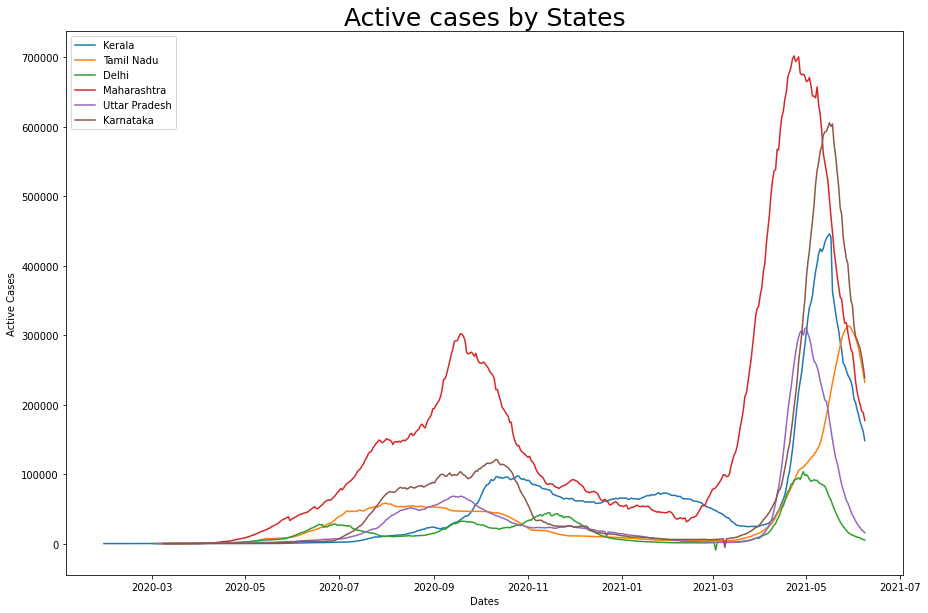

In [141]:
# Line plot for Active cases in top 6 states during the period of time
plt.figure(figsize=(15,10))
plt.title("Active cases by States",{'fontsize':25})
for i in states_list:
    plt.plot(india_df [india_df['State'] == i ].Date,india_df [india_df['State'] ==i ].Active,label =i)
    plt.legend()
plt.xlabel("Dates")
plt.ylabel('Active Cases')

In [142]:
state_df = india_df.groupby('State').sum()
state_df.sort_values('Deaths',ascending=False,inplace=True)
state_df = state_df.head()

No handles with labels found to put in legend.


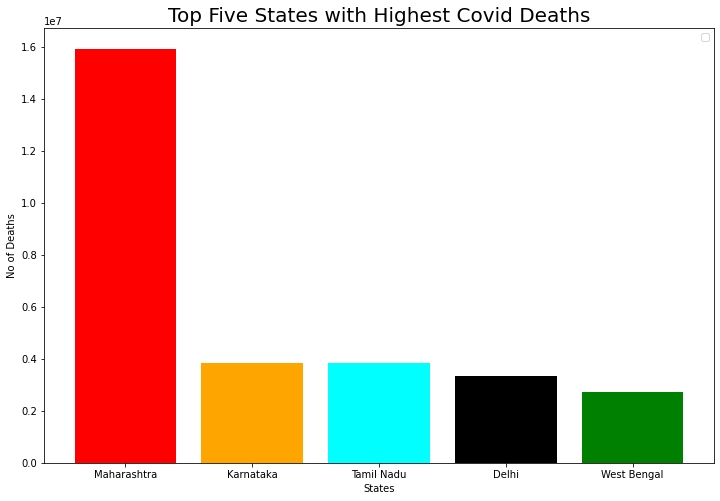

In [143]:
plt.figure(figsize=(12,8))
plt.bar(state_df.index,state_df.Deaths,color=['red','orange','cyan','black','green'])
plt.title("Top Five States with Highest Covid Deaths",{'fontsize':20});
plt.xlabel('States');
plt.ylabel('No of Deaths');
plt.legend();

In [144]:
# Now we plot top 5 states with high active cases
most_active_state = india_df.groupby('State').sum()
most_active_state.sort_values('Active',ascending=False,inplace=True)
most_active_state = most_active_state.head()
most_active_state

,Cured,Deaths,Confirmed,Active
State,,,,
Maharashtra,647435958,15930618,735227925,71861349
Karnataka,268843089,3832006,306212399,33537304
Kerala,232592813,972171,262232084,28667100
Tamil Nadu,250272855,3827295,272629006,18528856
Uttar Pradesh,183907499,2703716,203417849,16806634


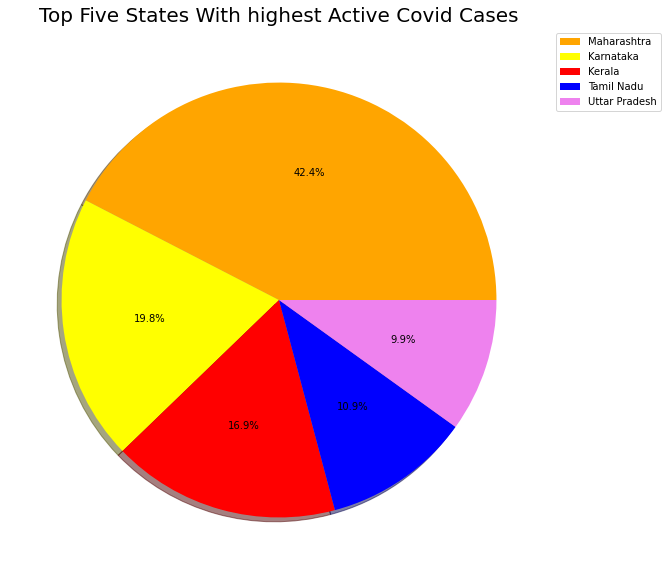

In [145]:
plt.figure(figsize=(10,10))
plt.pie(most_active_state['Active'],
        colors=['orange','yellow','red','blue','violet'],
        autopct='%1.1f%%',
        shadow=True);
plt.title("Top Five States With highest Active Covid Cases",{'fontsize':20})
plt.legend(most_active_state['Active'].index,loc='upper left',bbox_to_anchor=(1, 0, 0.5, 1));